# Import required libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense , Input , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error , r2_score
import seaborn as sns
%matplotlib inline

In [2]:
print(tf.__version__)

2.8.0


# Import data :

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_x=pd.read_csv("/content/drive/MyDrive/QM9/qm9_preprocessed/qm9_features32.csv")
y=pd.read_csv("/content/drive/MyDrive/QM9/qm9_preprocessed/qm9_labels.csv")

In [5]:
df_x.head()

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)","('Chi3n', <class 'numpy.float64'>)","('Chi3v', <class 'numpy.float64'>)","('Chi4n', <class 'numpy.float64'>)","('Chi4v', <class 'numpy.float64'>)","('EState_VSA1', <class 'numpy.float64'>)","('EState_VSA10', <class 'numpy.float64'>)","('EState_VSA2', <class 'numpy.float64'>)","('EState_VSA3', <class 'numpy.float64'>)","('EState_VSA4', <class 'numpy.float64'>)","('EState_VSA5', <class 'numpy.float64'>)","('EState_VSA6', <class 'numpy.float64'>)","('EState_VSA7', <class 'numpy.float64'>)","('EState_VSA8', <class 'numpy.float64'>)","('EState_VSA9', <class 'numpy.float64'>)","('ExactMolWt', <class 'numpy.float64'>)","('FpDensityMorgan1', <class 'numpy.float64'>)","('FpDensityMorgan2', <class 'numpy.float64'>)","('FpDensityMorgan3', <class 'numpy.float64'>)","('FractionCSP3', <class 'numpy.float64'>)","('HallKierAlpha', <class 'numpy.float64'>)","('HeavyAtomCount', <class 'numpy.float64'>)","('HeavyAtomMolWt', <class 'numpy.float64'>)","('Kappa1', <class 'numpy.float64'>)","('Kappa2', <class 'numpy.float64'>)","('Kappa3', <class 'numpy.float64'>)","('LabuteASA', <class 'numpy.float64'>)","('MaxAbsEStateIndex', <class 'numpy.float64'>)","('MaxAbsPartialCharge', <class 'numpy.float64'>)","('MaxEStateIndex', <class 'numpy.float64'>)","('MaxPartialCharge', <class 'numpy.float64'>)",...,"('fr_amide', <class 'numpy.float64'>)","('fr_amidine', <class 'numpy.float64'>)","('fr_aniline', <class 'numpy.float64'>)","('fr_aryl_methyl', <class 'numpy.float64'>)","('fr_benzene', <class 'numpy.float64'>)","('fr_bicyclic', <class 'numpy.float64'>)","('fr_dihydropyridine', <class 'numpy.float64'>)","('fr_epoxide', <class 'numpy.float64'>)","('fr_ester', <class 'numpy.float64'>)","('fr_ether', <class 'numpy.float64'>)","('fr_furan', <class 'numpy.float64'>)","('fr_guanido', <class 'numpy.float64'>)","('fr_halogen', <class 'numpy.float64'>)","('fr_imidazole', <class 'numpy.float64'>)","('fr_imide', <class 'numpy.float64'>)","('fr_ketone', <class 'numpy.float64'>)","('fr_ketone_Topliss', <class 'numpy.float64'>)","('fr_lactam', <class 'numpy.float64'>)","('fr_lactone', <class 'numpy.float64'>)","('fr_methoxy', <class 'numpy.float64'>)","('fr_morpholine', <class 'numpy.float64'>)","('fr_nitrile', <class 'numpy.float64'>)","('fr_nitro', <class 'numpy.float64'>)","('fr_nitro_arom', <class 'numpy.float64'>)","('fr_nitro_arom_nonortho', <class 'numpy.float64'>)","('fr_oxazole', <class 'numpy.float64'>)","('fr_oxime', <class 'numpy.float64'>)","('fr_para_hydroxylation', <class 'numpy.float64'>)","('fr_phenol', <class 'numpy.float64'>)","('fr_phenol_noOrthoHbond', <class 'numpy.float64'>)","('fr_piperdine', <class 'numpy.float64'>)","('fr_piperzine', <class 'numpy.float64'>)","('fr_priamide', <class 'numpy.float64'>)","('fr_pyridine', <class 'numpy.float64'>)","('fr_quatN', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,0.000020,0.000577,3.875255e-15,2.722966e-11,1.025154e-07,4.102548e-13,1.635214e-11,0.000019,0.000001,2.209078e-07,6.353499e-07,0.000003,0.000017,0.000013,4.074888e-10,2.175235e-08,0.263048,0.019674,2.509948e-11,9.258417e-11,5.856109e-17,0.000001,2.391450e-11,7.522456e-13,1.233457e-08,0.294906,0.009600,0.002319,9.993903e-01,0.988007,1.591864e-08,4.421801e-09,7.851986e-13,4.143328e-13,6.496181e-11,0.000004,0.007893,0.023999,0.007893,0.004593,...,7.139646e-07,2.641151e-12,0.099913,2.868092e-10,0.03473,1.875173e-18,7.105427e-15,0.499264,0.164929,1.317445e-17,2.111644e-16,1.168159e-09,3.2

In [6]:
y.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
0,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597
1,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961
2,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349
3,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429
4,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246


In [7]:
for i in y.columns:
  y[i]=y[i]/np.max(np.abs(y[i]))

In [8]:
y.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
0,0.000000,0.067185,-0.904573,0.605168,0.811445,0.010479,0.163351,0.137729,-0.056648,-0.056645,-0.056643,-0.056673
1,0.055000,0.048113,-0.599627,0.428424,0.546375,0.007751,0.125420,0.134472,-0.079105,-0.079102,-0.079101,-0.079128
2,0.062629,0.032092,-0.683154,0.355039,0.581096,0.005630,0.078027,0.127786,-0.106924,-0.106922,-0.106920,-0.106944
3,0.000000,0.082799,-0.663789,0.261499,0.538659,0.017638,0.097980,0.182546,-0.108189,-0.108186,-0.108185,-0.108210
4,0.097904,0.066067,-0.840877,0.098708,0.610191,0.014445,0.060600,0.133663,-0.130725,-0.130723,-0.130722,-0.130746


---------------
# Neural Network
---------------

## Data Splitting for Neural Network model







In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.1, random_state=23)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120496, 163)
(120496, 12)
(13389, 163)
(13389, 12)


# Building and Training a multi task Neural Network  



In [67]:
def reg_four_layer_model_config(n1=64,n2=32,n3=16,n4=12):
  input = Input(x_train.shape[1])
  model= Dense(n1, activation='relu')(input)
  #model=Dropout(0.1)(model)
  model=Dense(n2, activation='relu')(model)
  #model=Dropout(0.1)(model)
  model=Dense(n3, activation='relu')(model)
  #model=Dropout(0.1)(model)
  output=Dense(n4, activation='linear')(model)
  model=Model(inputs=input,outputs=output)
  return model

In [73]:
def comp(model,lr=0.05):
  model.compile(optimizer=Adam(learning_rate=lr),loss=tf.keras.losses.MeanAbsoluteError())
  return model

In [93]:
def plot_model(history):
    df=pd.DataFrame(history.history)
    plt.figure(figsize=(10,7))
    plt.plot(df['val_loss'])
    plt.plot(df['loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['validation loss','training loss'], loc='upper right')
    plt.title('Loss of train/validation sets vs Epochs')
    plt.ylim(0,0.3)
    plt.show()

In [14]:
model=reg_four_layer_model_config()

In [66]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 163)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                10496     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 12)                204       
                                                                 
Total params: 13,308
Trainable params: 13,308
Non-trainable params: 0
_________________________________________________________________


In [16]:
model=reg_four_layer_model_config()
comp(model,lr=0.001)
history = model.fit(x=x_train,y= y_train,batch_size =256,epochs=30,validation_split = 0.1 ,verbose=1)

Epoch 1/30
424/424 [==============================] - 2s 4ms/step - loss: 0.0654 - val_loss: 0.0298
Epoch 2/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0274 - val_loss: 0.0254
Epoch 3/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0243 - val_loss: 0.0230
Epoch 4/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0225 - val_loss: 0.0212
Epoch 5/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0209 - val_loss: 0.0204
Epoch 6/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0190
Epoch 7/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 8/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0178 - val_loss: 0.0177
Epoch 9/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0180
Epoch 10/30
424/424 [==============================] - 1s 3ms/step - loss: 0.0169 - val_loss: 0.0189

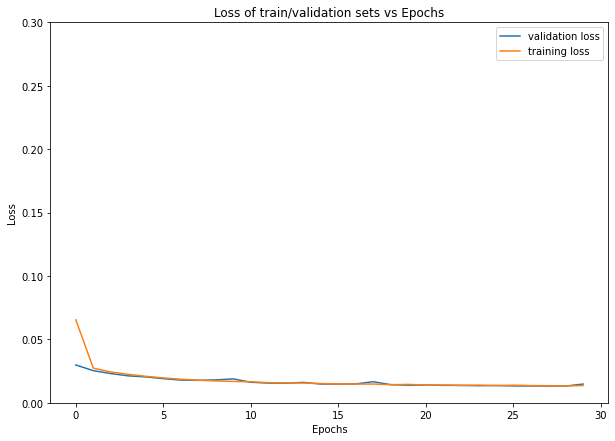

In [94]:
plot_model(history)

In [28]:
model.evaluate(x_test,y_test)

419/419 [==============================] - 1s 1ms/step - loss: 0.0147


0.014728481881320477

In [60]:
y_pred=pd.DataFrame(model.predict(x_test),columns=y.columns)
y_true=y_test

In [61]:
y_pred.index=y_true.index
mae=dict()
for i in y.columns:
  mae[i]=np.sum(np.abs(y_pred[i]-y_true[i]))/y_pred.shape[0]
mae

{'alpha': 0.006822382606793531,
 'cv': 0.0146717819680017,
 'g298': 0.006873683215714404,
 'gap': 0.01640501988525785,
 'h298': 0.006971502173753593,
 'homo': 0.01742838677533964,
 'lumo': 0.041079049282318536,
 'mu': 0.02379198733897312,
 'r2': 0.018390880762325777,
 'u0': 0.006959517333283232,
 'u298': 0.006759351698554906,
 'zpve': 0.010588238972809695}

### Task 'u298' has the least MAE

Before we proceed to train a Network with only task u298 as the response, let's have a look at our prediction responses and compare it to the real ones

In [20]:
yy=pd.read_csv("/content/drive/MyDrive/QM9/qm9_preprocessed/qm9_labels.csv")

In [21]:
for i in yy.columns:
  y_true[i]=y_true[i]*np.max(np.abs(yy[i]))
  y_pred[i]=y_pred[i]*np.max(np.abs(yy[i]))

In [22]:
y_true.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
106798,2.5317,78.05,-0.2320,0.0803,0.3123,1175.2690,0.182565,34.770,-424.217691,-424.208666,-424.207722,-424.251144
8319,1.1355,68.56,-0.2247,0.0618,0.2865,1193.0015,0.164873,31.814,-402.156782,-402.148032,-402.147088,-402.190746
114653,2.7218,68.18,-0.2347,-0.0264,0.2083,1081.1665,0.136287,29.668,-458.940410,-458.932697,-458.931753,-458.972843
17059,2.0521,73.08,-0.1994,0.0722,0.2716,967.4953,0.164868,30.660,-364.975003,-364.966997,-364.966053,-365.007460
91717,3.7467,66.08,-0.2631,0.0044,0.2674,956.8113,0.137987,28.018,-459.012604,-459.005483,-459.004539,-459.044138


In [23]:
y_pred.head()

,mu,alpha,homo,lumo,gap,r2,zpve,cv,u0,u298,h298,g298
0,1.986146,79.603813,-0.240386,0.069725,0.308054,1187.245850,0.187484,35.343655,-428.836182,-428.462128,-429.069916,-428.588135
1,2.191474,72.219681,-0.230624,0.066037,0.295627,1274.550049,0.166064,33.206379,-411.541870,-412.070343,-411.209778,-411.960419
2,2.659940,68.747925,-0.245024,-0.029613,0.214375,1072.949097,0.130606,29.974857,-463.998779,-464.010071,-464.291687,-463.959991
3,1.880925,73.273819,-0.225384,0.072037,0.296134,1037.774902,0.166019,31.479467,-371.262634,-371.808655,-371.144867,-371.580383
4,3.914824,67.942413,-0.270432,0.000578,0.267812,984.123779,0.140531,28.852852,-458.606049,-457.979828,-458.485931,-458.392578


_______

# Building and Training a one task Neural Network  



In [69]:
model1=reg_four_layer_model_config(n4=1)

In [70]:
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 163)]             0         
                                                                 
 dense_12 (Dense)            (None, 64)                10496     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
_________________________________________________________________


In [81]:
model1=reg_four_layer_model_config(n4=1)
comp(model1,lr=0.01)
history1 = model1.fit(x=x_train,y= y_train['u298'],batch_size =256,epochs=22,validation_split = 0.1 ,verbose=1)

Epoch 1/22
424/424 [==============================] - 3s 5ms/step - loss: 0.0242 - val_loss: 0.0127
Epoch 2/22
424/424 [==============================] - 2s 4ms/step - loss: 0.0132 - val_loss: 0.0107
Epoch 3/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0120 - val_loss: 0.0098
Epoch 4/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0095 - val_loss: 0.0104
Epoch 5/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0067
Epoch 6/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 7/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 8/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0074
Epoch 9/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 10/22
424/424 [==============================] - 1s 3ms/step - loss: 0.0051 - val_loss: 0.0037

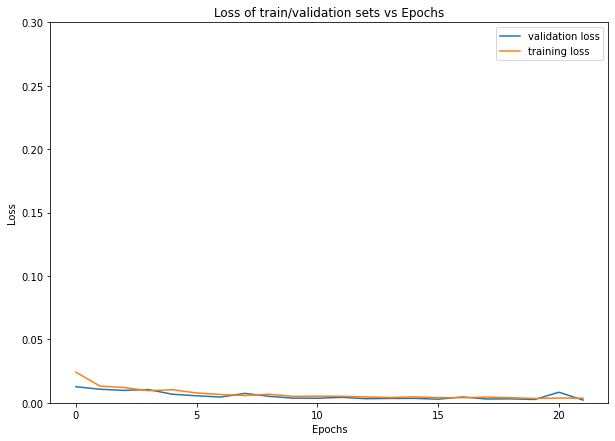

In [95]:
plot_model(history1)

In [96]:
model1.evaluate(x_test,y_test['u298'])

419/419 [==============================] - 1s 2ms/step - loss: 0.0022


0.0021934513933956623

In [103]:
y_pred1=pd.DataFrame(model1.predict(x_test))
y_true1=y_test['u298']

y_true1=y_true1*np.max(np.abs(yy['u298']))
y_pred1=y_pred1*np.max(np.abs(yy['u298']))

print(f"Prediction : {y_pred1} , True label : {y_true1}")

Prediction :                 0
0     -424.092926
1     -398.949432
2     -457.707703
3     -366.033752
4     -456.422974
...           ...
13384 -452.218903
13385 -398.788696
13386 -397.876923
13387 -423.971283
13388 -363.766205

[13389 rows x 1 columns] , True label : 106798   -424.208666
8319     -402.148032
114653   -458.932697
17059    -364.966997
91717    -459.005483
             ...    
113530   -455.091390
36217    -396.932109
6012     -401.040050
121269   -424.189758
10149    -363.881869
Name: u298, Length: 13389, dtype: float64


---------------
# Decision Tree
---------------


## Data Splitting for decision tree






In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y['u298'], test_size=0.1, random_state=50)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120496, 163)
(120496,)
(13389, 163)
(13389,)


# Building Decision Tree by modifying depth and number of leaf nodes

In [ ]:
tree = DecisionTreeRegressor(criterion='absolute_error',max_depth=3)
tree.fit(x_train, y_train)

In [ ]:
y_pred2= clf.predict(x_train)

In [ ]:
y_pred2= tree.predict(x_train)

In [ ]:
mae=mean_absolute_error(y_test,y_pred2)

In [ ]:
r2_score(y_test, y_pred2)

In [ ]:
depth = []
for i in range(3,10):
    tree = DecisionTreeRegressor(criterion='absolute_error',max_depth=i)
    tree.fit(x_train, y_train)
print(depth)